# Result description

## Test with publics datasets

In [1]:
import sys
sys.path.append('../../../../../')
from datasets import datasets as datat
dts = datat.reals_datasets(path_top="../../../../../")

from experiments import trainning_parametors
t_parametors = trainning_parametors.functions_train_parametors()


## Generals settings

In [2]:
#dts = datat.reals_datasets(path_top="../../../../")
max_samples = 256
n_trees = 100
threshold = 0.6
min_sample_size = 5
sample_size_step = 5

## Executions

### Dataset Shuttle_Goldein
#### Conclusion on this dataset :


################################################## IFOREST ###################################
X_Train is None. So, trainning on X_brut.
Confusion matrice
[[  877     0]
 [36428  9158]]
ROC AUC : 0.6004475058131883
Specificity : 1.0
Precision : 1.0
Recall : 0.20089501162637652
f1_score : 0.33457547859126113
False alarm rate (%) : 97.64910869856588
CPU Time (s) : 55.504749059677124
Memory Consumption (o) : 21786624
****************************************************************
Result with IForest


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


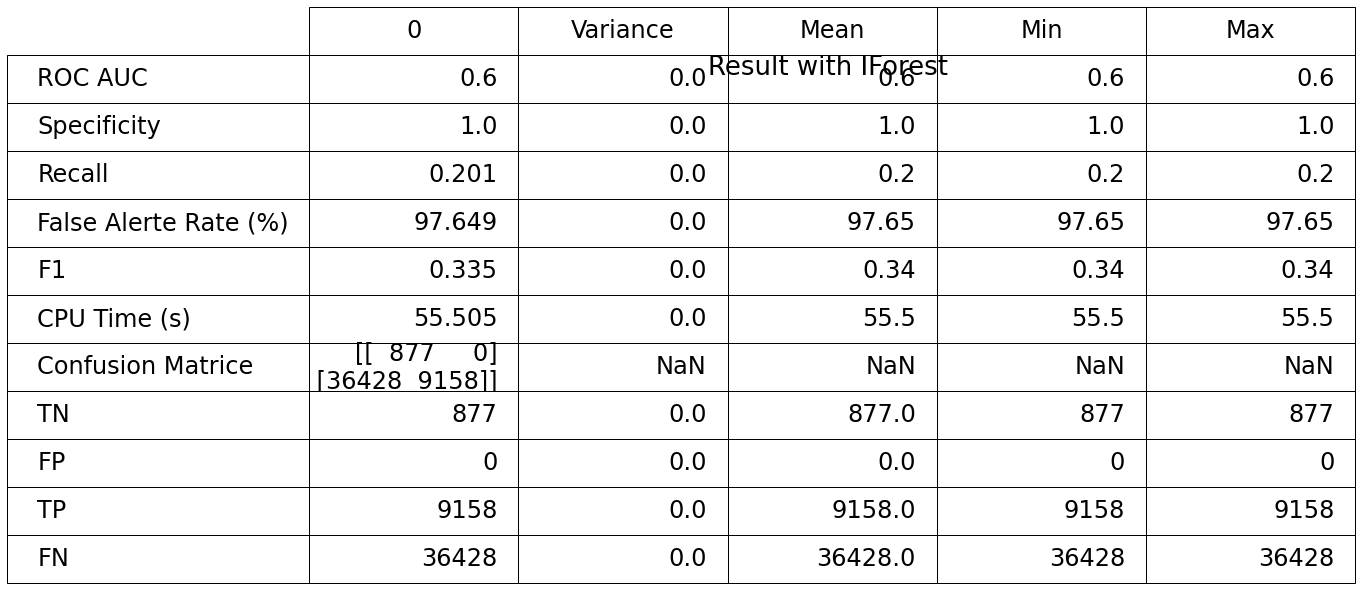

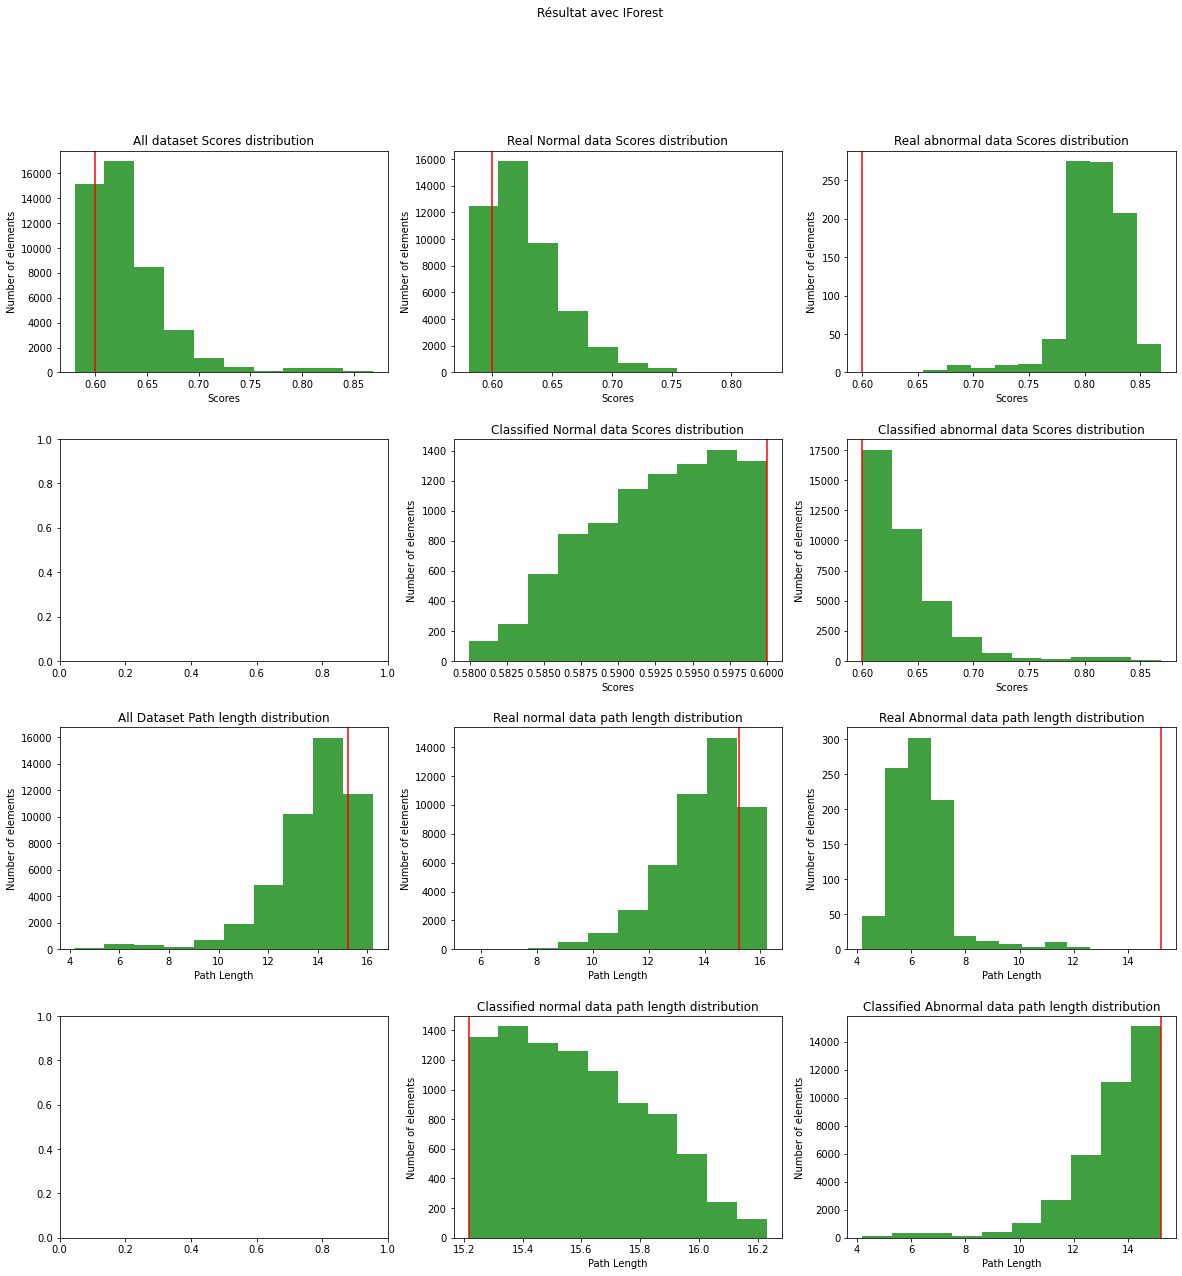

In [3]:
# Load the dataset
import pandas as pd
X_brut, y_transform, full_dataset = dts.Shuttle_Goldein()
x_lim = None
y_lim = None
#X_brut.describe()
#pd.set_option("display.max_rows", None, "display.max_columns", None)
#print(X_brut)
print("################################################## IFOREST ###################################")
fig, axs, IFD_scores, IFD_paths_length = t_parametors.execute_IForest_getting_informations(X_brut=X_brut, max_samples=max_samples, n_trees=n_trees, threshold=threshold, 
                y_transform=y_transform, x_lim=x_lim, y_lim=y_lim, n_dimensions=4)

In [4]:
print(IFD_scores)

[[0.79700317]
 [0.80924286]
 [0.82902845]
 ...
 [0.61237296]
 [0.61128191]
 [0.64548466]]


In [5]:
def save_scores(scores, folder_path="NULL", output_file = 'output.csv'):
    import os
    import pandas as pd
    result = pd.DataFrame(scores)
    result.to_csv(output_file,index=False)
    return output_file

In [6]:
print(save_scores(IFD_scores))

output.csv


In [7]:
print(IFD_scores.mean())

0.6300410846247283


In [39]:
pd_scores = pd.DataFrame(IFD_scores)
sorted_scores = pd_scores.sort_values(by=0, axis=0, 
                                      ascending=True, inplace=False, 
                                      kind='quicksort', na_position='last', 
                                      ignore_index=False, key=None)
print(sorted_scores)

              0
11288  0.579926
31005  0.580149
26500  0.580199
39466  0.580199
2510   0.580199
...         ...
855    0.865332
628    0.866677
63     0.868085
512    0.868620
445    0.868668

[46463 rows x 1 columns]


In [40]:
moit = int(len(sorted_scores)/2)
print(moit)

23231


In [41]:
first = sorted_scores[:moit]
rest = sorted_scores[moit:]

In [42]:
print(first)

              0
11288  0.579926
31005  0.580149
26500  0.580199
39466  0.580199
2510   0.580199
...         ...
40403  0.620969
28632  0.620971
17718  0.620972
17743  0.620974
37754  0.620976

[23231 rows x 1 columns]


In [43]:
print(rest)

              0
22867  0.620980
32164  0.620980
23531  0.620982
2108   0.620983
4266   0.620984
...         ...
855    0.865332
628    0.866677
63     0.868085
512    0.868620
445    0.868668

[23232 rows x 1 columns]


In [44]:
print("first mean = "+str(first.mean()))
print("rest mean = "+str(rest.mean()))


first mean = 0    0.603338
dtype: float64
rest mean = 0    0.656743
dtype: float64


In [45]:
print("first quantiles = "+str(first.quantile([0.25, 0.5, 0.75, 0.9])))
print("rest quantiles = "+str(rest.quantile([0.25, 0.5, 0.75, 0.9, 0.95])))

first quantiles =              0
0.25  0.594984
0.50  0.603647
0.75  0.611984
0.90  0.617153
rest quantiles =              0
0.25  0.631262
0.50  0.644447
0.75  0.666849
0.90  0.697766
0.95  0.733001


In [46]:
print("first median = "+str(first.median()))
print("rest median = "+str(rest.median()))

first median = 0    0.603647
dtype: float64
rest median = 0    0.644447
dtype: float64


In [47]:
print("first std = "+str(first.std()))
print("rest std = "+str(rest.std()))

first std = 0    0.010255
dtype: float64
rest std = 0    0.040059
dtype: float64


In [48]:
print("first var = "+str(first.var()))
print("rest var = "+str(rest.var()))

first var = 0    0.000105
dtype: float64
rest var = 0    0.001605
dtype: float64


In [49]:
print("pd_scores var = "+str(pd_scores.var()))
print("pd_scores std = "+str(pd_scores.std()))

pd_scores var = 0    0.001568
dtype: float64
pd_scores std = 0    0.039598
dtype: float64


In [50]:
import numpy as np
number = []
variances = []
ecarttypes = []
for i in np.arange(0.1, 1.1, 0.1):
    nbre = int(len(sorted_scores)*i)
    dataf = sorted_scores[:nbre]
    number.append(i)
    variances.append(dataf.var())
    ecarttypes.append(dataf.std())

stats = {'percentage': number, 'ecarttype':ecarttypes, 'variances':variances}
stats_df = pd.DataFrame(stats, columns=['percentage', 'ecarttype', 'variances'])
print(stats_df)

   percentage                     ecarttype                     variances
0         0.1  0    0.003123
dtype: float64   0    0.00001
dtype: float64
1         0.2  0    0.004801
dtype: float64  0    0.000023
dtype: float64
2         0.3  0    0.006574
dtype: float64  0    0.000043
dtype: float64
3         0.4  0    0.008378
dtype: float64   0    0.00007
dtype: float64
4         0.5  0    0.010255
dtype: float64  0    0.000105
dtype: float64
5         0.6  0    0.012375
dtype: float64  0    0.000153
dtype: float64
6         0.7  0    0.014821
dtype: float64   0    0.00022
dtype: float64
7         0.8  0    0.017898
dtype: float64   0    0.00032
dtype: float64
8         0.9  0    0.022463
dtype: float64  0    0.000505
dtype: float64
9         1.0  0    0.039598
dtype: float64  0    0.001568
dtype: float64


Text(0, 0.5, 'ecarttype')

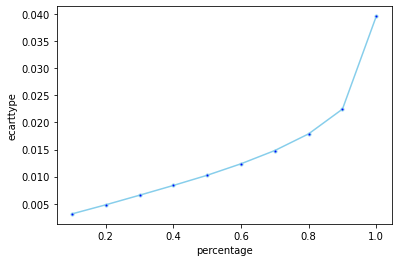

In [51]:
import matplotlib.pyplot as plt
plt.plot(stats_df['percentage'], stats_df['ecarttype'], "b-", marker='.', markerfacecolor='blue', 
                 markersize=6, color='skyblue')
#plt.title(title)
plt.xlabel("percentage")
plt.ylabel("ecarttype")
#plt.axis([xmin, xmax, ymin, ymax])

Text(0, 0.5, 'variances')

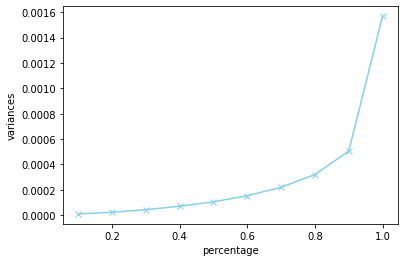

In [52]:
plt.plot(stats_df['percentage'], stats_df['variances'], "b-", marker='x', markerfacecolor='red', 
                 markersize=6, color='skyblue')
#plt.title(title)
plt.xlabel("percentage")
plt.ylabel("variances")
#plt.axis([xmin, xmax, ymin, ymax])

In [55]:
nbre = int(len(sorted_scores)*0.9)
dataf_rest = sorted_scores[nbre:]
print(dataf_rest)

              0
31269  0.674048
10298  0.674048
36144  0.674048
39911  0.674054
11562  0.674055
...         ...
855    0.865332
628    0.866677
63     0.868085
512    0.868620
445    0.868668

[4647 rows x 1 columns]


In [56]:
print(stats_df.mean())

percentage    0.550000
ecarttype     0.014029
variances     0.000302
dtype: float64


In [57]:
print(stats_df.median())

percentage    0.550000
ecarttype     0.011315
variances     0.000129
dtype: float64


In [79]:
mean_variances = stats_df.mean()['variances']
print(mean_variances)

0.0003017063996455748


In [71]:
t = stats_df.loc[stats_df['variances'] >= mean_variances]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [80]:
t = list(np.where(stats_df['variances'] >= mean_variances))

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [80]:
t = list(np.where(stats_df['variances'] >= mean_variances))

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().